In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from sklearn.decomposition import PCA 

In [31]:
df = pd.read_csv (r'/content/drive/MyDrive/pima-indians-diabetes.csv')
df_new=df.copy()


In [33]:
#creating a list of attributes
list_of_attributes=list(df.columns)
print(list_of_attributes)
list_of_attributes_1=list_of_attributes.copy() #creating a copy

list_of_attributes_1.remove('class')

['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi', 'Age', 'class']


In [34]:
mean_list=[]
std_list=[]
for attribute in list_of_attributes_1:               #finding mean and standard deviation for modified dataframe
  mean=df_new[attribute].mean()
  mean_list.append(mean)
  
  calculated_standard_deviation=df_new[attribute].std()
  std_list.append(calculated_standard_deviation)

In [35]:
i=0
new_meanl=[]
new_stdl=[]
df1=df_new.copy()                                 #Standardizing dataframe i.e making it's mean=0 and standard deviation=1
for attribute in list_of_attributes_1:
  mean=mean_list[i]
  std=std_list[i]
  data=list(df1[attribute])
  for j in data:
    value=(j-mean)/std
    df1[attribute]=df1[attribute].replace(j,value)
  new_mean=df1[attribute].mean()
  new_meanl.append(new_mean)

Text(0.5, 1.0, 'Plot of 2D synthetic data and eigen directions')

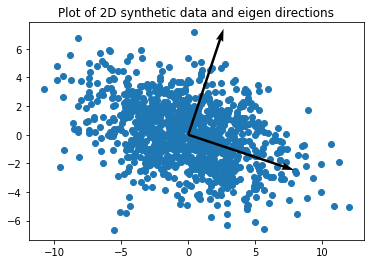

In [22]:
mean_matrix=[0,0]
#mean=np.transpose(matrix)
covariance=[[13,-3],[-3,5]]

D=np.random.multivariate_normal(mean_matrix,covariance,1000) #Generating synthetic data of 1000 sampleswith given mean and covariance 
ans=np.linalg.eig(covariance)    #eigen decomposition of covariance matrix gives us matrix of eigen vectors and diagonal matrix containing eigen values
#print(ans)
#print(D)

eigenvectors=ans[1]
eigenvalues=ans[0]
#D=np.transpose(d)
ev1=eigenvectors[:,0]
ev2=eigenvectors[:,1]
#print(ev1,ev2)                
#print(D)

principal_data=D.dot(eigenvectors)      #This new matrix is a standardized version of D and each observation is a combination of the original variables

plt.scatter(D[:,0],D[:,1])

plt.quiver(0, 0, ev1[0],ev1[1], scale=3, color='k') #plotting eigen direction
plt.quiver(0, 0, ev2[0],ev2[1], scale=3, color='k')
plt.title("Plot of 2D synthetic data and eigen directions")


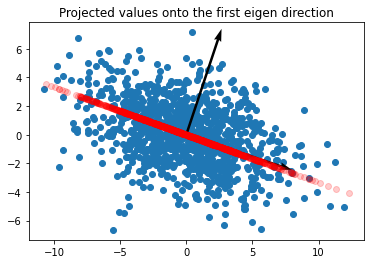

In [23]:
X=ev1[0]*principal_data[:,0]       
Y=ev1[1]*principal_data[:,0]

plt.scatter(D[:,0],D[:,1])
plt.quiver(0, 0, ev1[0],ev1[1], scale=3, color='k')
plt.quiver(0, 0, ev2[0],ev2[1], scale=3, color='k')
plt.scatter(X,Y,color = 'r',alpha = 0.2)
plt.title('Projected values onto the first eigen direction')
plt.show()

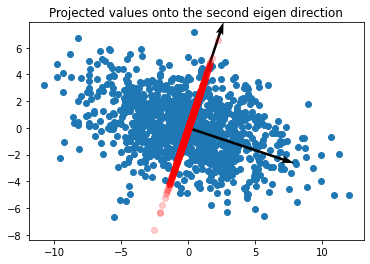

In [25]:
X=ev2[0]*principal_data[:,1]
Y=ev2[1]*principal_data[:,1]

plt.scatter(D[:,0],D[:,1])
plt.quiver(0, 0, ev1[0],ev1[1], scale=3, color='k')
plt.quiver(0, 0, ev2[0],ev2[1], scale=3, color='k')
plt.scatter(X,Y,color = 'r',alpha = 0.2)
plt.title('Projected values onto the second eigen direction')
plt.show()

In [36]:
df_2=df1.copy()
df_2.drop(columns='class')

,pregs,plas,pres,skin,test,BMI,pedi,Age
0,0.639530,42.781305,20.226553,9.245949,-1.141108,8.830467,-0.955031,13.697545
1,-0.844335,24.084602,18.445914,7.465311,-1.141108,6.753056,-1.036941,8.058857
2,1.233077,53.168363,17.852368,-1.141108,-1.141108,5.773704,-0.941676,8.355630
3,-0.844335,25.271695,18.445914,5.684673,26.755560,7.198215,-1.091547,5.091126
4,-1.141108,39.516802,10.729815,9.245949,48.716767,11.649811,-0.462091,8.652403
...,...,...,...,...,...,...,...,...
763,1.826623,28.832971,21.413645,13.103999,52.278043,8.622726,-1.090360,17.555595
764,-0.547562,35.065206,19.633006,6.871765,-1.141108,9.780141,-1.040205,6.871765
765,0.342757,34.768433,20.226553,5.684673,32.097475,6.634346,-1.068398,7.762084
766,-0.844335,36.252298,16.665276,-1.141108,-1.141108,7.791761,-1.037534,12.807226


In [40]:
pca = PCA(n_components=2).fit_transform(df_2) #reducing 8 dimension data to 2 dimension

In [48]:
variance=pca.var() 
print("Variance of the projected data along the 2 direction is",variance)

Variance of the projected data along the 2 direction is 632.8650146650208


Text(0.5, 1.0, 'Scatter plot of reduced dimensional data')

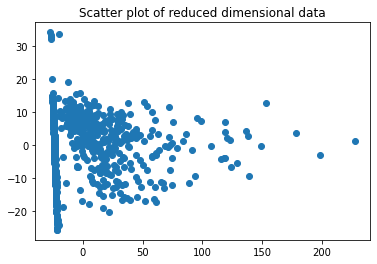

In [46]:
plt.scatter(pca[:,0],pca[:,1])
plt.title('Scatter plot of reduced dimensional data')  # plotting reduced data

In [54]:
df_2_t=np.transpose(df_2)
covariance=np.dot(df_2_t,df_2)
ans=np.linalg.eig(covariance)    #eigen decomposition of covariance matrix gives us matrix of eigen vectors and diagonal matrix containing eigen value
eigenvectors=ans[1]
eigenvalues=ans[0]
print(eigenvalues)

[2.16008966e+06 5.42016220e+05 3.24486903e+04 1.34089137e+04
 7.72136036e+03 3.56639543e+03 5.85151769e+02 1.35548358e+02
 3.04733764e+01]


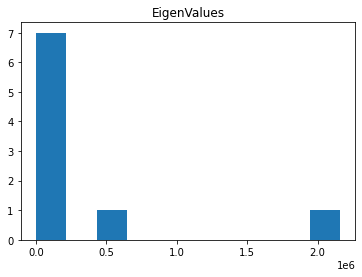

In [55]:
plt.hist(eigenvalues)  # plotting eigenvalues in descending order
plt.title('EigenValues')
plt.show()